<a href="https://colab.research.google.com/github/praveen101323/v/blob/main/ml_linear_(car).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression



In [ ]:
# prompt: He wants to know his average expenses for each semester. Using a for loop, calculate John’s average expenses for the first semester (January to June) and the second semester (July to December).

import numpy as np
expenses = np.array([2385.00, 1500.00, 1800.00, 2200.00, 2500.00, 2100.00,
       2400.00, 1900.00, 1700.00, 2000.00, 2600.00, 2200.00])

first_semester_expenses = expenses[:6]
second_semester_expenses = expenses[6:]

average_first_semester = np.mean(first_semester_expenses)
average_second_semester = np.mean(second_semester_expenses)

print("Average expenses for the first semester:", average_first_semester)
print("Average expenses for the second semester:", average_second_semester)


Average expenses for the first semester: 2080.8333333333335
Average expenses for the second semester: 2133.3333333333335


In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/aishuej/dataset/main/car_data.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [ ]:
df.drop("Market Category", axis= 'columns',inplace=True)


In [ ]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [ ]:
df['Engine Fuel Type'].fillna(method='bfill',inplace=True)
df['Engine Cylinders'].fillna(method='bfill',inplace=True)
df['Engine HP'].fillna(method='bfill',inplace=True)
df['Number of Doors'].fillna(method='bfill',inplace=True)

In [ ]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [ ]:
q3=df.MSRP.quantile(.75)
q1=df.MSRP.quantile(.25)

q3,q1
iqr=q3-q1
iqr
lower=q1-1.5*iqr
upper=q3+1.5*iqr
lower,upper

(-10846.875, 74078.125)

In [ ]:
df1=df[(df.MSRP>lower)&(df.MSRP<upper)]
df1

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
df2=df1.select_dtypes(include='number')
df2

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500
...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,46120
11910,2012,300.0,6.0,4.0,23,16,204,56670
11911,2012,300.0,6.0,4.0,23,16,204,50620
11912,2013,300.0,6.0,4.0,23,16,204,50920


In [ ]:
! pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'HIO')

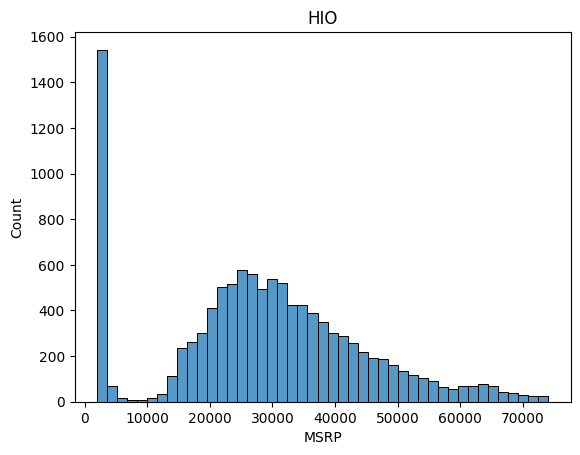

In [ ]:
sns.histplot(df2['MSRP'])
plt.title('HIO')


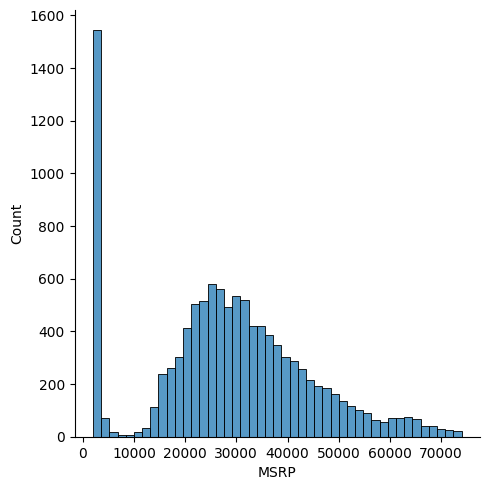

In [ ]:
sns.displot(df1['MSRP'])

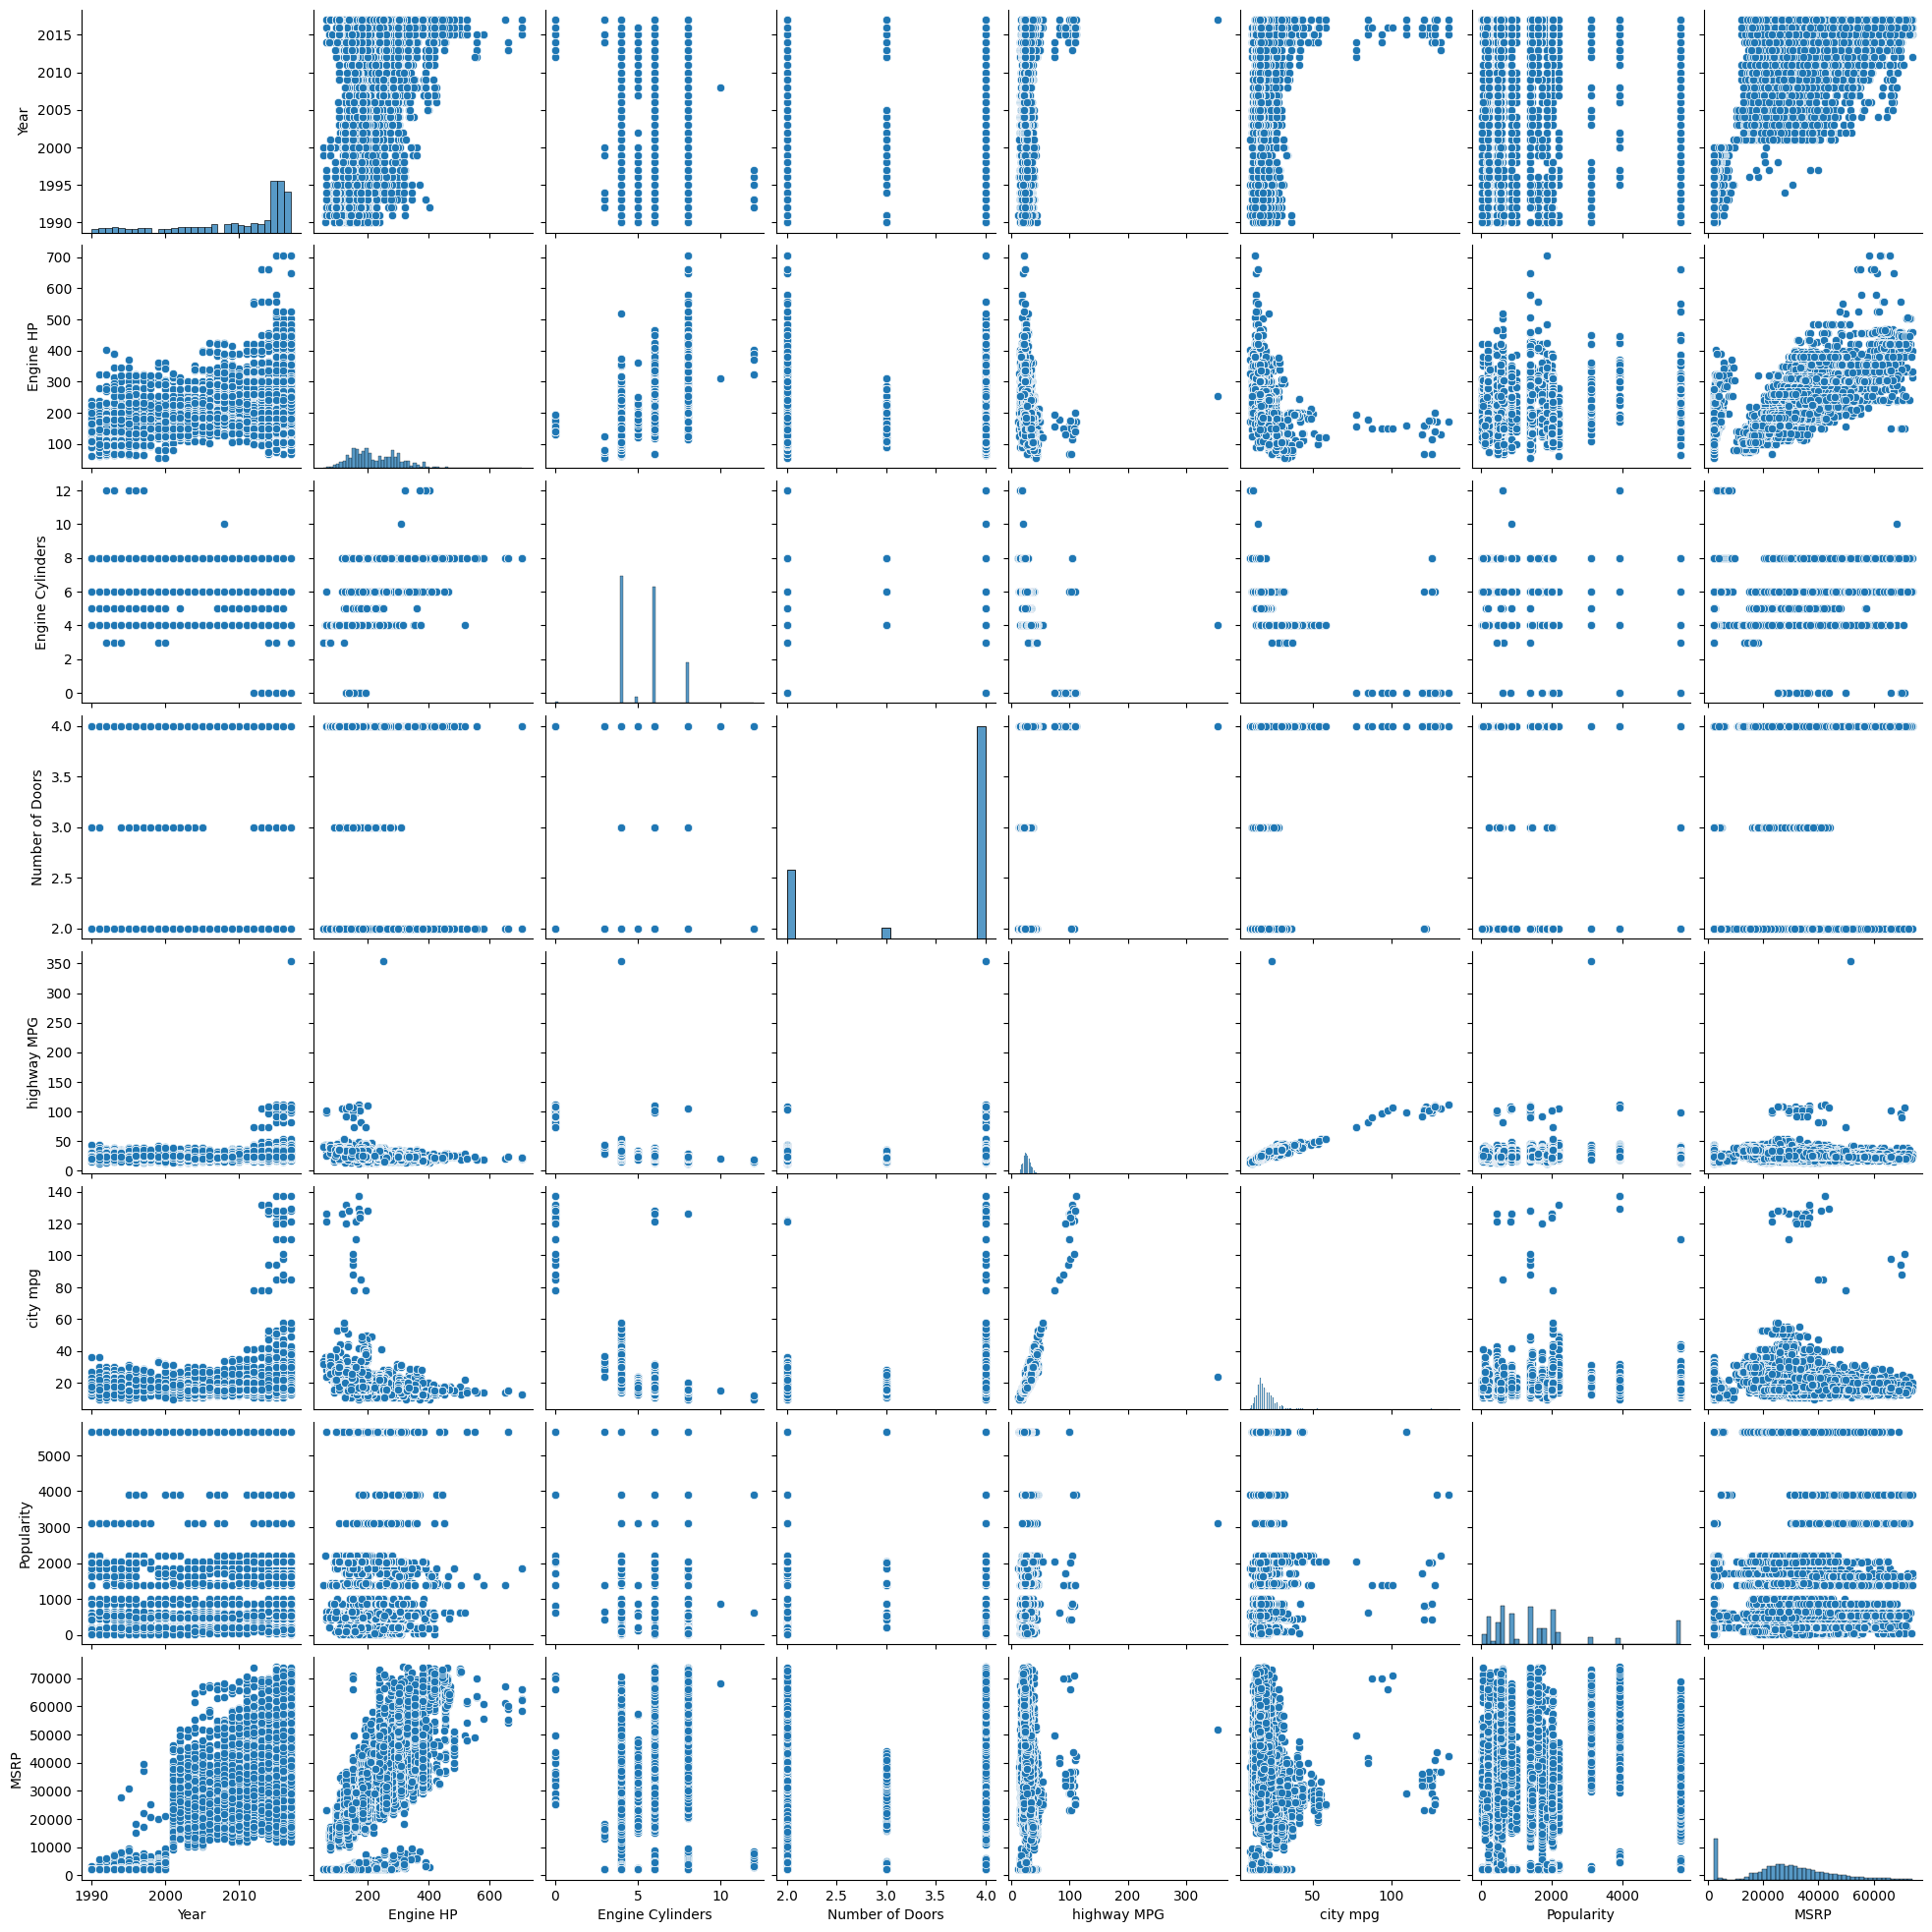

In [ ]:
sns.pairplot(df1)

In [ ]:
df2.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.383763,-0.113289,0.304309,0.288633,0.224906,0.079780,0.696262
Engine HP,0.383763,1.000000,0.683933,0.071152,-0.348365,-0.352038,0.090593,0.729813
Engine Cylinders,-0.113289,0.683933,1.000000,-0.021172,-0.610635,-0.565205,0.102845,0.284866
Number of Doors,0.304309,0.071152,-0.021172,1.000000,0.079417,0.081432,-0.060366,0.211695
highway MPG,0.288633,-0.348365,-0.610635,0.079417,1.000000,0.872951,-0.039043,-0.007879
city mpg,0.224906,-0.352038,-0.565205,0.081432,0.872951,1.000000,-0.016118,-0.035043
Popularity,0.079780,0.090593,0.102845,-0.060366,-0.039043,-0.016118,1.000000,0.034824
MSRP,0.696262,0.729813,0.284866,0.211695,-0.007879,-0.035043,0.034824,1.000000


<Axes: >

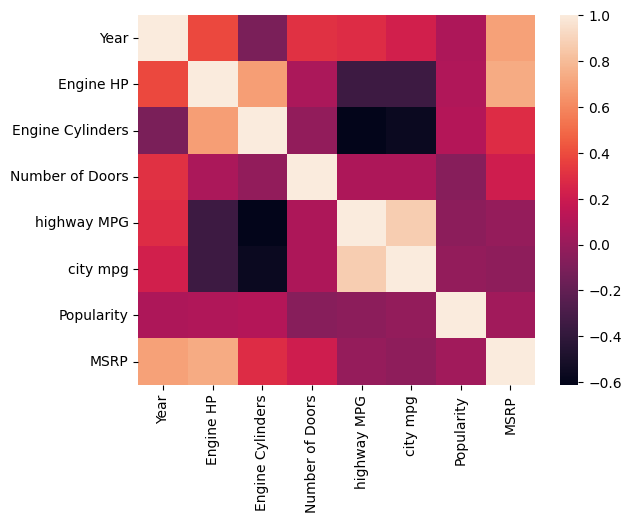

In [ ]:
sns.heatmap(df2.corr())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11914 non-null  object 
 4   Engine HP          11914 non-null  float64
 5   Engine Cylinders   11914 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11914 non-null  float64
 9   Vehicle Size       11914 non-null  object 
 10  Vehicle Style      11914 non-null  object 
 11  highway MPG        11914 non-null  int64  
 12  city mpg           11914 non-null  int64  
 13  Popularity         11914 non-null  int64  
 14  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [ ]:
from sklearn import preprocessing
for i in df1.select_dtypes(include=['object']).columns:
  label_encoder = preprocessing.LabelEncoder()
  label_encoder.fit(df1[i].unique())
  df1[i] = label_encoder.transform(df1[i])
  print(f'{i}: {df1[i].unique()}')

Make: [ 3  2  9 24  7 26 38 23 25  1 36 29 30 31 11 15 28 14 27 34 10  5 17  6
  8 20 33 37  4  0 19 18 21 16 32 12 22 13 35]
Model: [  1   0   2   3   4   6   7   8  10   9   5  13  12  15  16  14  17  18
  19  20  21  22  11  24  23  25  26  27  28  31  30  33  36  32  34  35
  37  29  39  40  41  38  42  43  44  45  46  47  48  49  50  51  53  52
  54  55  56  59  58  57  60  61  62  63  64  65  66  68  67  69  70  71
  76  75  77  78  80  81  82  79  83  84  85  86  87  88 781 780  90  89
  91  92  93  94  96  95  73  74  72  97  98 100  99 101 102 103 104 105
 106 107 109 110 108 111 113 115 114 116 117 118 119 120 121 122 123 124
 125 127 126 128 112 129 130 133 134 135 136 157 156 158 159 160 162 163
 161 164 165 166 167 168 169 170 171 173 172 137 174 175 176 177 178 179
 180 181 182 184 185 183 131 132 139 138 186 140 141 187 188 189 190 191
 193 192 195 194 196 197 199 198 200 142 143 201 202 203 204 205 207 206
 144 145 147 150 151 149 148 146 208 209 211 212 213 210 152 153

<ipython-input-25-fe2f8d2c05f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i] = label_encoder.transform(df1[i])
<ipython-input-25-fe2f8d2c05f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i] = label_encoder.transform(df1[i])
<ipython-input-25-fe2f8d2c05f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [ ]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
x= df1.drop('MSRP',axis=1)
y=df1['MSRP']
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=52)
x_train, x_test,y_train,y_test

(       Make  Model  Year  Engine Fuel Type  Engine HP  Engine Cylinders  \
 4372     10    280  2010                 9      210.0               6.0   
 7725     23    524  2001                 9      130.0               4.0   
 7239      8    497  2010                 9      210.0               6.0   
 3409     23    155  2015                 9      273.0               6.0   
 11052    36    721  2017                 4      381.0               8.0   
 ...     ...    ...   ...               ...        ...               ...   
 10009     8    671  2004                 9      150.0               4.0   
 4736     10    299  2006                 9      203.0               6.0   
 8506     14    587  2017                 9      280.0               6.0   
 10783     6    715  2017                 9      138.0               4.0   
 7874      2    535  2014                 0      240.0               6.0   
 
        Transmission Type  Driven_Wheels  Number of Doors  Vehicle Size  \
 4372      

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
# increase the acuracy optional
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)
#print(x_train)
#print(x_test)

In [ ]:
# train the linear regression model
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([15883.91945933, 44489.06883747, 20573.26483121, ...,
       39827.37245804, 29246.30239058, 34992.70995132])

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mse

63194968.67885588

In [ ]:
from sklearn.metrics import r2_score

r2= r2_score(y_test,y_pred)
r2

0.7578895434070971

In [ ]:
print(model.coef_)
print(model.intercept_)

[-6.87187256e+01 -4.36439285e-01  7.82369166e+02 -6.57990570e+02
  1.17187733e+02 -7.95603153e+02 -1.40606052e+03 -1.35365203e+03
 -8.17122845e+01  2.87431443e+02 -1.01162854e+02  2.87647267e+01
  4.96044955e+01 -5.98507919e-01]
-1555207.3932513425


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10918 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               10918 non-null  int64  
 1   Model              10918 non-null  int64  
 2   Year               10918 non-null  int64  
 3   Engine Fuel Type   10918 non-null  int64  
 4   Engine HP          10918 non-null  float64
 5   Engine Cylinders   10918 non-null  float64
 6   Transmission Type  10918 non-null  int64  
 7   Driven_Wheels      10918 non-null  int64  
 8   Number of Doors    10918 non-null  float64
 9   Vehicle Size       10918 non-null  int64  
 10  Vehicle Style      10918 non-null  int64  
 11  highway MPG        10918 non-null  int64  
 12  city mpg           10918 non-null  int64  
 13  Popularity         10918 non-null  int64  
 14  MSRP               10918 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 1.3 MB


In [ ]:
Year = int(input())
Engine_HP = float(input())
highway_MPG = int(input())
result = model.coef_[0]*Year + model.coef_[1]*Engine_HP + model.coef_[4]*highway_MPG + model.intercept_
result

KeyboardInterrupt: Interrupted by user

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, Ridge

In [ ]:
lasso_model=Lasso()
Ridge_model=Ridge()
alpha_values=[0.001,0.01,0.1,1]

l1=GridSearchCV(lasso_model,{'alpha':alpha_values},cv=5)
r1=GridSearchCV(Ridge_model,{'alpha':alpha_values},cv=6)
l1.fit(x_train,y_train)
r1.fit(x_train,y_train)
best_lasso_params=l1.best_params_
best_lasso_score=l1.best_score_
best_ridge_params=r1.best_params_
best_ridge_score=r1.best_score_

print('best_lasso_params:',best_lasso_params)
print('best_lasso_score:',best_lasso_score)
print('best_ridge_params:',best_ridge_params)
print('best_ridge_score:',best_ridge_score)

best_lasso_params: {'alpha': 1}
best_lasso_score: 0.7658531297971315
best_ridge_params: {'alpha': 1}
best_ridge_score: 0.7656631250893134


In [ ]:
model.score(x_train,y_train)

0.7668432575352561

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:

var=VarianceThreshold(threshold=0.25)
x_trans=var.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_trans,y,test_size=0.2,random_state=2)

log_with_var=model.fit(x_train,y_train)

pred=log_with_var.predict(x_test)

r2=r2_score(y_test,pred)
mae=mean_absolute_error(y_test,pred)
mse=mean_squared_error(y_test,pred)

print("r2_score:",r2)
print("mae:\n",mae)
print("mse:\n",mse)

r2_score: 0.7637837474865072
mae:
 6032.823557976691
mse:
 61169885.84244401


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score
param_grid={'C':[0.1,1,10], 'penalty':['l1','l2']}
grid_search=GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_pramas=grid_search.best_params_
best_model=LogisticRegression(**best_params)
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
class_rep=classification_report(pred,y_test)
accuracy=accuracy_score(y_test, pred)
accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

NameError: name 'best_params' is not defined